In [8]:
from tilepy.include.ObservationScheduler import getdate, GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os

In [9]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
#cfgFile = '../obsConfig/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D) only. Path is given in datasetDir 
galcatName = "Gladeplus.h5"

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

Please choose one of the following maps, dates and obseratory arrays to launch the scheduler
- The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
- Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
- Observatory array as a list

In [4]:
#GW follow-up: Multi-observatory campaign from the Northern and Southern hemisphere using the FoV-integrated 3-dimensional strategy
url = 'https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz'
obsTime = getdate("2023-03-15 20:51:47")
ObsArray = ['CTAN', 'CTAS']

In [4]:
#Very poorly localized Fermi-GBM GRB: Multi-telescope campaign at one site
url = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit'
obsTime = getdate("2023-10-12 20:42:18")
ObsArray = ['LST1', 'LST2','LST3','LST4']

In [10]:
#IPN GRB follow-up: Single narrow FoV radio telescope in the Southern Hemisphere
url = 'https://www.ioffe.ru/LEA/ShortGRBs_IPN/data/20120612T59382/GRB20120612_T59382_IPN_map_hpx.fits.gz'
obsTime = getdate("2017-08-17 10:30:10")
ObsArray = ['ATCA']

In [8]:
#GW follow-up: Multi optical observatory campaign around the globe
url = 'https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz'
obsTime = getdate("2023-09-15 01:30:10")
ObsArray = ['ESO', 'ESO2', 'LP','LPL', 'OHP', 'SA', 'HA']

In [11]:
# Config file for the tiling scheduling are in ../obsConfig/
parameters = []
for i in ObsArray:
    parameters.append("../obsConfig/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['../obsConfig/FollowupParameters_ATCA.ini']


In [12]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(url, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType, locCut)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

https://www.ioffe.ru/LEA/ShortGRBs_IPN/data/20120612T59382/GRB20120612_T59382_IPN_map_hpx.fits.gz
The filename is  GRB20120612_T59382_IPN_map_hpx.fits.gz
curl https://www.ioffe.ru/LEA/ShortGRBs_IPN/data/20120612T59382/GRB20120612_T59382_IPN_map_hpx.fits.gz -o GRB20120612_T59382_IPN_map_hpx.fits.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  563k  100  563k    0     0   647k      0 --:--:-- --:--:-- --:--:--  647k


Is the hotspot in the galactic plane? False
Starting the 2D pointing calculation with the following parameters

Filename:  data
Date:  2017-08-17 10:30:10
Dataset:  ../../tilepy/dataset/
Output:  ./output/data

obsparameters 1
Loading LVC HEALPix map from file: GRB20120612_T59382_IPN_map_hpx.fits.gz
The total probability PGW:  0.7144
Observation Time UTC RA(deg) DEC(deg)  PGW   Round ObsName Duration FoV
-------------------- ------- -------- ------ ----- ------- -------- ---
 2017-08-17 13:50:10 40.3898 -48.0434 0.0152     1    ATCA       10 0.1
 2017-08-17 14:00:10 41.6704 -48.3368 0.0244     1    ATCA       10 0.1
 2017-08-17 14:10:10 42.1685 -48.4345 0.0242     1    ATCA       10 0.1
 2017-08-17 14:20:10 41.9663 -48.4345 0.0239     1    ATCA       10 0.1
 2017-08-17 14:30:10 42.4662 -48.5323 0.0234     1    ATCA       10 0.1
 2017-08-17 14:40:10 41.4686 -48.3368 0.0219     1    ATCA       10 0.1
 2017-08-17 14:50:10 42.6689 -48.5323 0.0212     1    ATCA       10 0.1
 2017-08-17 15:0

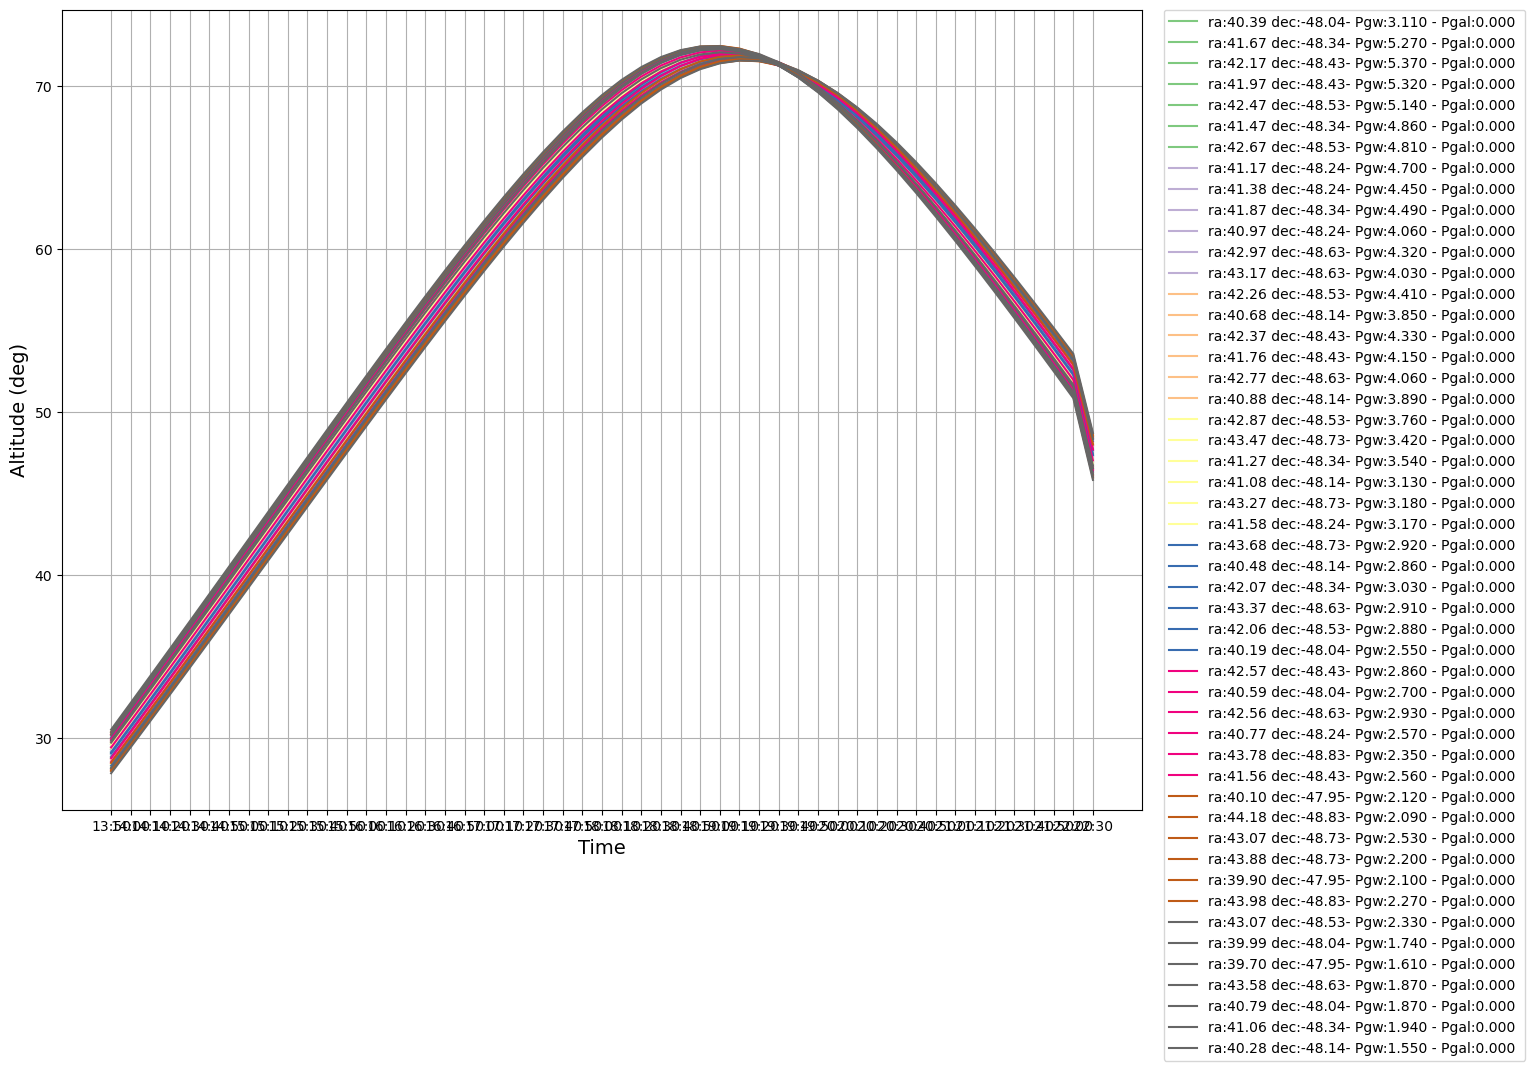

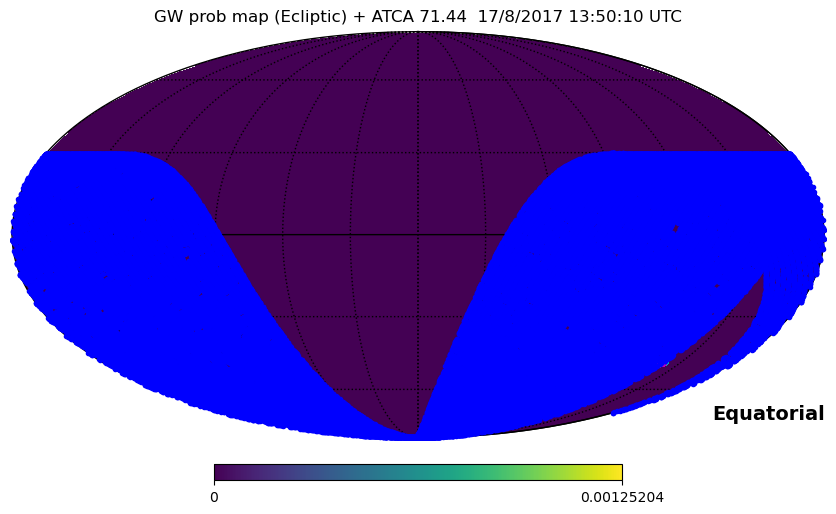

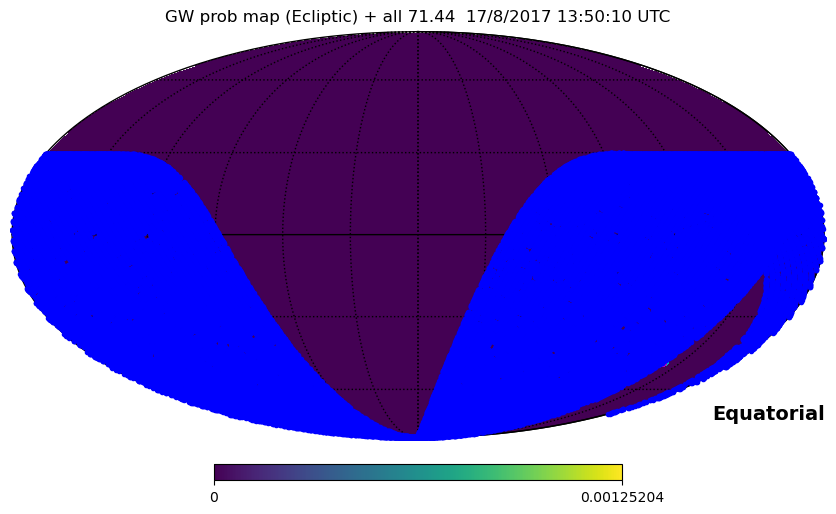

In [13]:
GetUniversalSchedule(obsparameters)